In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

1. Análise exploratória de dados: O aluno deverá realizar uma análise inicial dos dados do dataset
escolhido, identificando quais variáveis estão presentes, quais são numéricas/categóricas e se
existem valores faltantes ou outliers.

In [21]:
df=pd.read_csv('train.csv',sep=",")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [22]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [23]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [24]:
media_zona=df.groupby('MSZoning')['LotFrontage'].mean()

MSZoning
C (all)    69.700000
FV         59.491228
RH         58.923077
RL         74.680043
RM         52.366834
Name: LotFrontage, dtype: float64

In [38]:
media_quarto=df['BedroomAbvGr'].mean()
media_quarto=media_quarto.round(2)
media_quarto

2.87

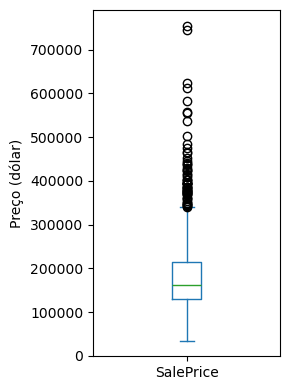

In [25]:
ax=(df['SalePrice']).plot.box(figsize=(3,4))
ax.set_ylabel('Preço (dólar)')
plt.tight_layout()
plt.show()

In [29]:
media_zona_preco=df.groupby('MSZoning')['SalePrice'].mean()
media_zona_preco=media_zona_preco.round(2)
media_zona_preco

MSZoning
C (all)     74528.00
FV         214014.06
RH         131558.38
RL         191004.99
RM         126316.83
Name: SalePrice, dtype: float64

In [31]:
media_preco=df['SalePrice'].mean()
media_preco=media_preco.round(2)
media_preco

180921.2

2. Feature engineering: Com base na análise exploratória, o aluno deverá realizar transformações
nas variáveis do dataset, como normalização, codificação de variáveis categóricas, criação de
novas features, dentre outras técnicas.


In [32]:
def media_preco_def(SalePrice):
    if SalePrice > media_preco:
        return 'Acima da média'
    else:
        return 'Abaixo da média'
df['Média de preço']=df['SalePrice'].apply(media_preco_def)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Média de preço
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Acima da média
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Acima da média
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Acima da média
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Abaixo da média
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Acima da média
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Abaixo da média
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Acima da média
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Acima da média
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,Abaixo da média


In [39]:
def quartos(BedroomAbvGr):
    if BedroomAbvGr > media_quarto:
        return 'Acima da média'
    else:
        return 'Abaixo da média'
df['Média de quarto']=df['BedroomAbvGr'].apply(quartos)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Média de preço,Média de quarto
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,Acima da média,Acima da média
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,Acima da média,Acima da média
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,Acima da média,Acima da média
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,Abaixo da média,Acima da média
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,Acima da média,Acima da média
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,Abaixo da média,Acima da média
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,Acima da média,Acima da média
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Acima da média,Acima da média
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,Abaixo da média,Abaixo da média


3-Aprendizagem supervisionada: O aluno deverá escolher um dos modelos de aprendizagem supervisionada (Regressão Linear, Naive Bayes, Regressão Logística, KNN, Árvore de Decisão, Random Forest ou XGBoost), realizar o treinamento do modelo com o dataset e avaliar seu desempenho com métricas adequadas.

In [46]:
x= df[['GrLivArea', 'YearBuilt', 'OverallQual']]
y = df['SalePrice']
x = x.dropna()
y = y[x.index]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.7568410825781496
RMSE: 43186.89867091719


In [47]:
cols_cluster = ['GrLivArea', 'YearBuilt', 'OverallQual', 'SalePrice']
X_cluster = df[cols_cluster].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


X_scaled_df = pd.DataFrame(X_scaled,
                           columns=cols_cluster,
                           index=X_cluster.index)
kmeans = KMeans(
    n_clusters=3,    
    init='k-means++',
    n_init=10,
    random_state=42
)
df.loc[X_cluster.index, 'cluster_house'] = kmeans.fit_predict(X_scaled_df)
media_cluster = (
    df
    .groupby('cluster_house')[cols_cluster]
    .mean()
    .rename_axis('cluster'))
count_cluster = df['cluster_house'].value_counts().sort_index()

print("\nCaracterísticas médias por cluster:")
print(media_cluster)

print("\nNúmero de casas em cada cluster:")
print(count_cluster)


Características médias por cluster:
           GrLivArea    YearBuilt  OverallQual      SalePrice
cluster                                                      
0.0      2302.206897  1993.231527     8.137931  327618.965517
1.0      1595.307692  1993.446154     6.713462  196916.459615
2.0      1242.427408  1949.569878     5.104478  129228.951153

Número de casas em cada cluster:
cluster_house
0.0    203
1.0    520
2.0    737
Name: count, dtype: int64


5. Métricas de avaliação e comparação: O aluno deverá utilizar as métricas adequadas para
avaliar o desempenho dos modelos de aprendizagem supervisionada, comparando-os entre si e
com o modelo não supervisionado escolhido.

O modelo de Regressão Linear foi eficaz na previsão do preço das casas, explicando 75,68% da variância (R²) e com um erro médio (RMSE) de cerca de 43.186. Já o modelo de Clusterização (K-Means), apesar de não prever valores, segmentou bem os imóveis em grupos com diferentes perfis de preço e características, como tamanho, ano e qualidade. Com isso, os dois modelos se complementam: a regressão prevê valores e o K-Means ajuda a entender os perfis típicos de imóveis no mercado.